In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 0)

# might be needed depending on your version of Jupyter
%matplotlib inline

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"


In [4]:
def feat_info(col_name):
    '''
    This function will render the description of the columns from info dataframe.
    '''
    return (col_name+" in our table refers to the "+data_info.loc[col_name]['Description'])

In [5]:
df = pd.read_csv('lending_club_loan_two.csv')

In [6]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# #1 Exploratory Data Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


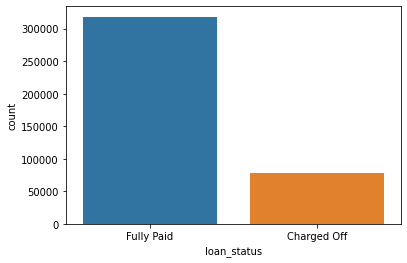

In [8]:
sb.countplot(df['loan_status'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


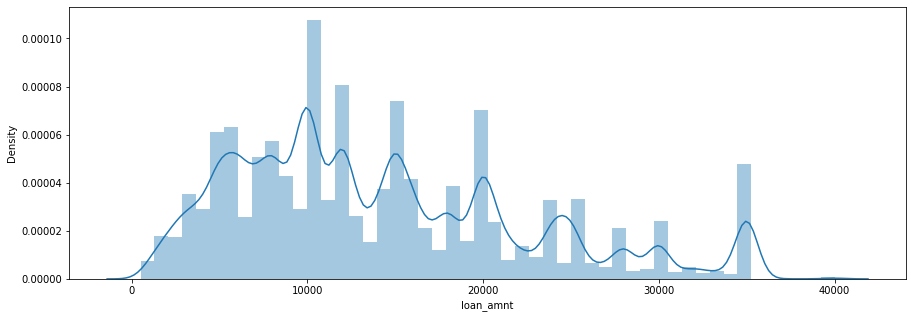

In [9]:
plt.figure(figsize=(15,5))
sb.distplot(df['loan_amnt'])

><h2>Correlation Analysis</h2>

In [10]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


>Using heat map to visualize our correlation.

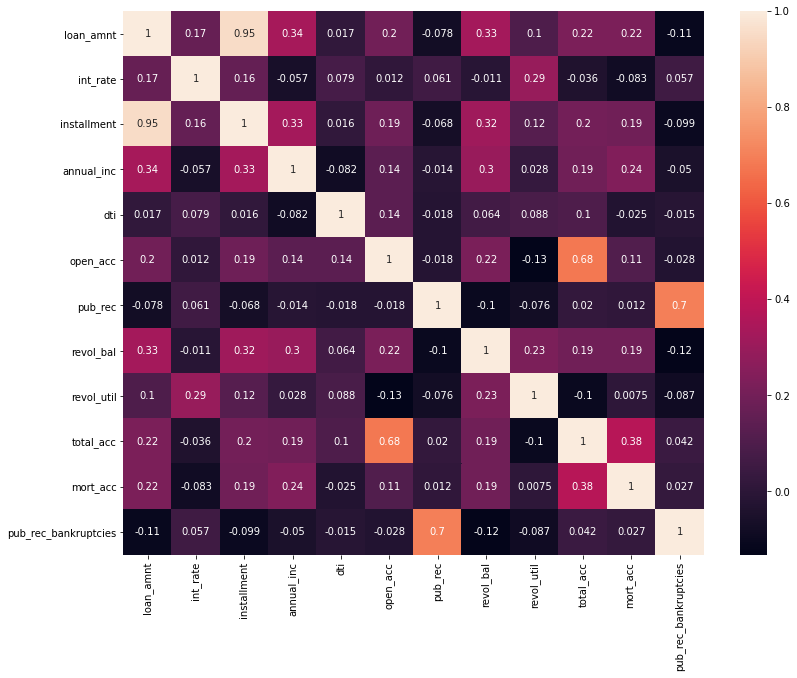

In [11]:
plt.figure(figsize=(13,10))
sb.heatmap(df.corr(), annot=True)

Installment have almost perfect correlation with the data.
>Exploring **Installment** feature to check if make sense more than this.

In [12]:
feat_info('installment')

'installment in our table refers to the The monthly payment owed by the borrower if the loan originates.'

In [13]:
feat_info('loan_amnt')

'loan_amnt in our table refers to the The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

---

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


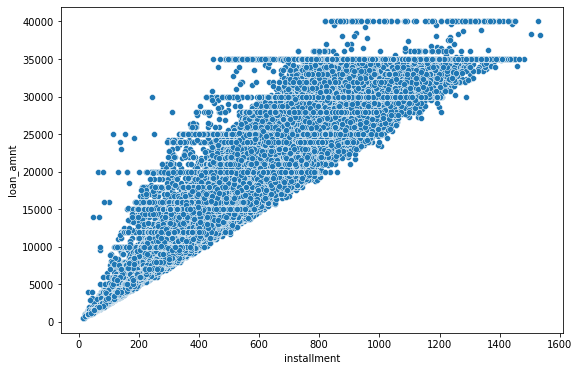

In [14]:
plt.figure(figsize=(9,6))
sb.scatterplot('installment', 'loan_amnt', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


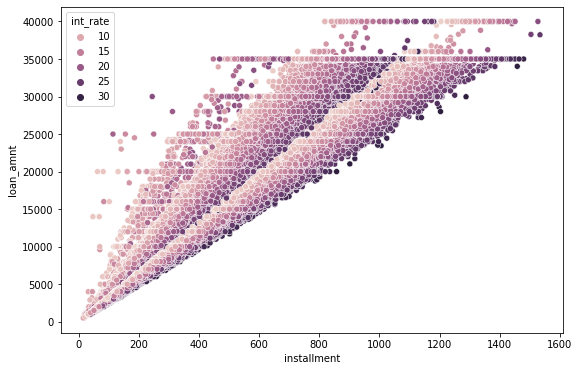

In [15]:
plt.figure(figsize=(9,6))
sb.scatterplot('installment', 'loan_amnt', data=df, hue='int_rate')

In [16]:
#sb.scatterplot('installment', 'term', data=df, hue='int_rate')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


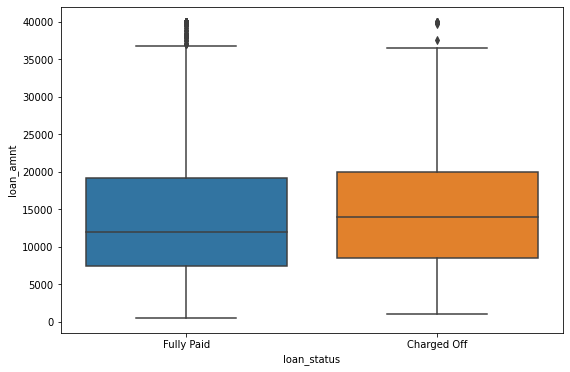

In [17]:
plt.figure(figsize=(9,6))
sb.boxplot('loan_status', 'loan_amnt', data=df)

In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [19]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [20]:
sorted(df['sub_grade'].unique().astype(str))

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


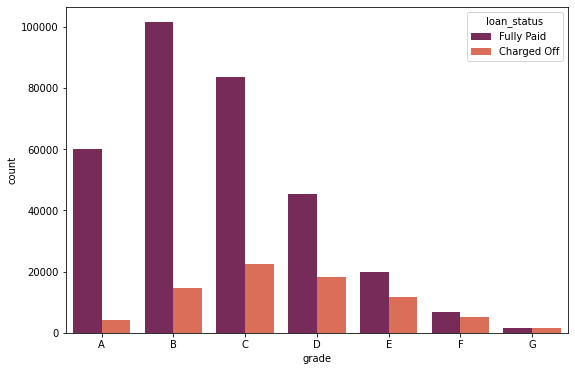

In [21]:
plt.figure(figsize=(9,6))
sb.countplot('grade', hue='loan_status',data=df, palette='rocket', order=sorted(df['grade'].unique()))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


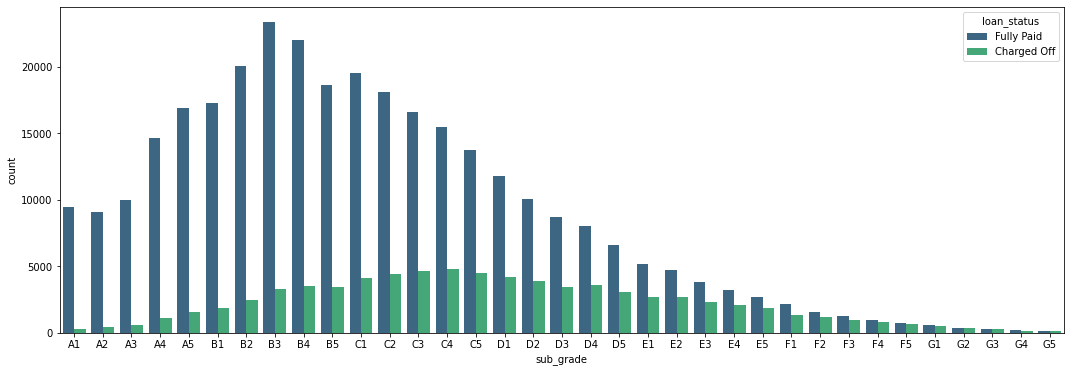

In [22]:
plt.figure(figsize=(18,6))
sb.countplot('sub_grade', hue='loan_status',data=df, palette='viridis', order=sorted(df['sub_grade'].unique().astype(str)))

> Looks like F and G grade doesn't get paid back that often.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


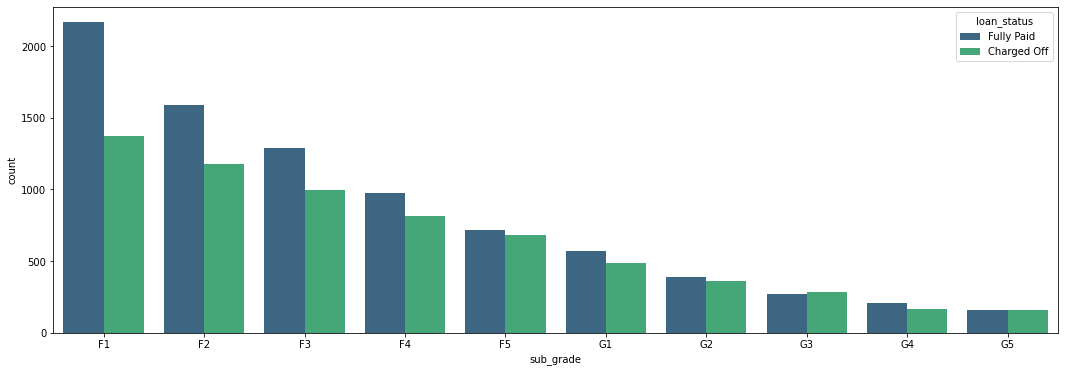

In [23]:
f_and_g_df = df[(df['grade']=='G')|(df['grade']=='F')]

plt.figure(figsize=(18,6))
sb.countplot('sub_grade', hue='loan_status',data=f_and_g_df, palette='viridis', order=sorted(f_and_g_df['sub_grade'].unique().astype(str)))

><h3> Let's analyze loan_status </h3> </br>

>Remapping loan_status categorical column to loan_repaid

In [24]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [25]:
df.drop('loan_status', axis=1, inplace=True)

In [26]:
df.corr()['loan_repaid'].sort_values(ascending=False)

loan_repaid             1.000000
mort_acc                0.073111
annual_inc              0.053432
total_acc               0.017893
revol_bal               0.010892
pub_rec_bankruptcies   -0.009383
pub_rec                -0.019933
open_acc               -0.028012
installment            -0.041082
loan_amnt              -0.059836
dti                    -0.062413
revol_util             -0.082373
int_rate               -0.247758
Name: loan_repaid, dtype: float64

> **mort_acc has the highest positive correlation with the loan_status whereas int_rate have the highest negative correlation**

In [27]:
print(feat_info('mort_acc'))
print(feat_info('int_rate'))

mort_acc in our table refers to the Number of mortgage accounts.
int_rate in our table refers to the Interest Rate on the loan


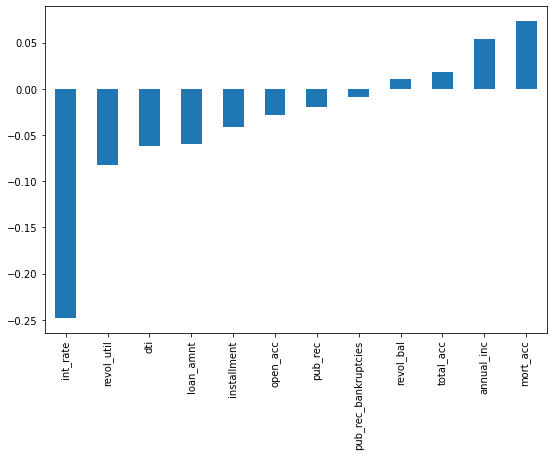

In [28]:
plt.figure(figsize=(9,6))
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')

---
---

# #2 Data Preprocessing

In [29]:
df.isna().sum()

loan_amnt               0    
term                    0    
int_rate                0    
installment             0    
grade                   0    
sub_grade               0    
emp_title               22927
emp_length              18301
home_ownership          0    
annual_inc              0    
verification_status     0    
issue_d                 0    
purpose                 0    
title                   1755 
dti                     0    
earliest_cr_line        0    
open_acc                0    
pub_rec                 0    
revol_bal               0    
revol_util              276  
total_acc               0    
initial_list_status     0    
application_type        0    
mort_acc                37795
pub_rec_bankruptcies    535  
address                 0    
loan_repaid             0    
dtype: int64

In [30]:
100* df.isna().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

>We have emp_title and emp_length with 5 and 4 percentage of missing data respectively.<br>
>Checking if we can drop them from the dataframe.<br>

>**emp_title**

In [31]:
df['emp_title']

0         Marketing               
1         Credit analyst          
2         Statistician            
3         Client Advocate         
4         Destiny Management Inc. 
                   ...            
396025    licensed bankere        
396026    Agent                   
396027    City Carrier            
396028    Gracon Services, Inc    
396029    Internal Revenue Service
Name: emp_title, Length: 396030, dtype: object

In [32]:
df['emp_title'].nunique()

173105

In [33]:
df['emp_title'].value_counts()

Teacher                                4389
Manager                                4250
Registered Nurse                       1856
RN                                     1846
Supervisor                             1830
                                       ... 
Travis Central Appraisal District      1   
Early Childhood Services Director      1   
iT Specialist                          1   
Heartland Post Hospitalization Care    1   
affordable spiral stairs               1   
Name: emp_title, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Removing emp_title column.**

In [34]:
df.drop('emp_title', axis=1, inplace=True)

> **emp_length**

In [35]:
df['emp_length']

0         10+ years
1         4 years  
2         < 1 year 
3         6 years  
4         9 years  
           ...     
396025    2 years  
396026    5 years  
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [36]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [37]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


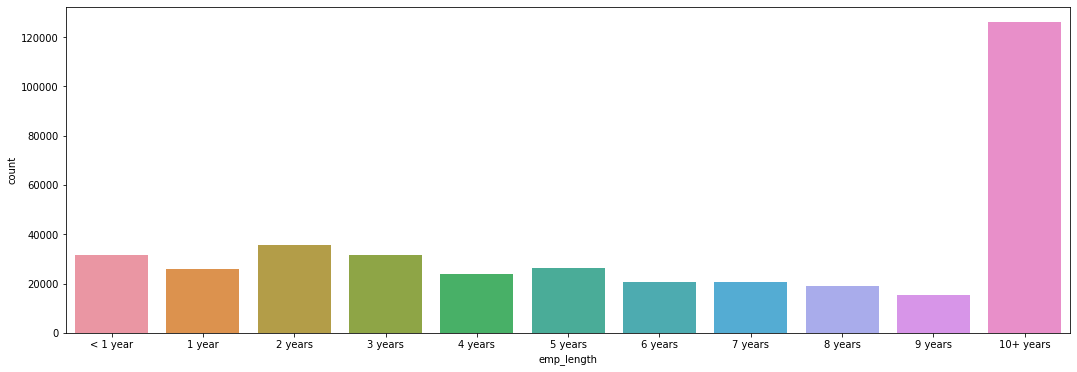

In [38]:
plt.figure(figsize=(18,6))
sb.countplot('emp_length', data=df, order=emp_length_order)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


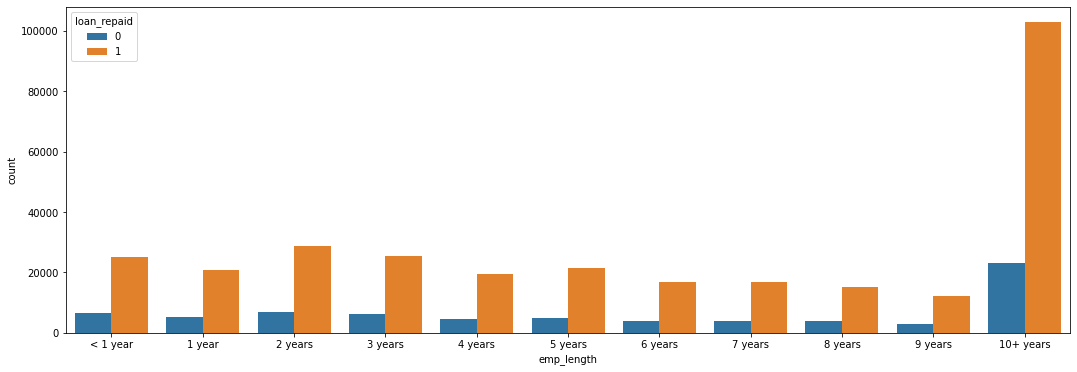

In [39]:
plt.figure(figsize=(18,6))
sb.countplot('emp_length', data=df, order=emp_length_order, hue='loan_repaid')

>Calculating charge off percetage per category.

In [40]:
emp_len = df[df['loan_repaid']==0].groupby('emp_length').count()['loan_amnt'] / df[df['loan_repaid']==1].groupby('emp_length').count()['loan_amnt']

In [41]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_amnt, dtype: float64

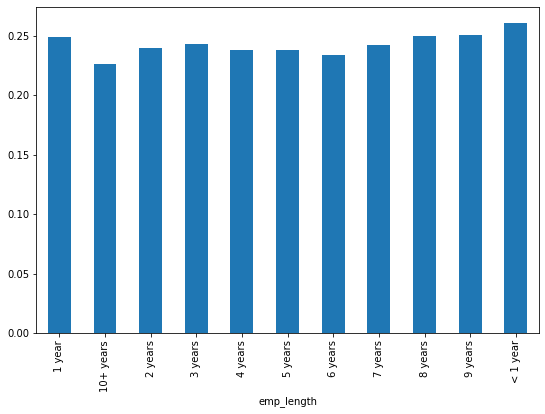

In [42]:
plt.figure(figsize=(9,6))
emp_len.plot(kind='bar')

> All the data are very close to each other. Dropping emp_length.

In [43]:
df.drop('emp_length', axis=1, inplace=True)

In [44]:
df.isna().sum()

loan_amnt               0    
term                    0    
int_rate                0    
installment             0    
grade                   0    
sub_grade               0    
home_ownership          0    
annual_inc              0    
verification_status     0    
issue_d                 0    
purpose                 0    
title                   1755 
dti                     0    
earliest_cr_line        0    
open_acc                0    
pub_rec                 0    
revol_bal               0    
revol_util              276  
total_acc               0    
initial_list_status     0    
application_type        0    
mort_acc                37795
pub_rec_bankruptcies    535  
address                 0    
loan_repaid             0    
dtype: int64

> Title column is simply a string subcategory/description of the purpose column. Dropping

In [45]:
df.drop('title', axis=1, inplace=True)

> mort_acc

In [46]:
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [47]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [48]:
def impute_mort_acc(total_acc, mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else: 
        return mort_acc

In [49]:
df['mort_acc'] = df.apply(lambda x: impute_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [50]:
df.isna().sum()

loan_amnt               0  
term                    0  
int_rate                0  
installment             0  
grade                   0  
sub_grade               0  
home_ownership          0  
annual_inc              0  
verification_status     0  
issue_d                 0  
purpose                 0  
dti                     0  
earliest_cr_line        0  
open_acc                0  
pub_rec                 0  
revol_bal               0  
revol_util              276
total_acc               0  
initial_list_status     0  
application_type        0  
mort_acc                0  
pub_rec_bankruptcies    535
address                 0  
loan_repaid             0  
dtype: int64

> Since remaining missing values accounts less than 0.5% of the total data we can safely remove missing remove.

In [51]:
df.dropna(inplace=True)

In [52]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

><h3> Handling categorical data</h3>

In [53]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

**term**

In [54]:
df['term'] = df['term'].apply(lambda term: int(re.findall(r'\d+', term)[0]))

**grade**

In [55]:
#Dropping grade since we can use sub_grade as an alternative.
df.drop('grade', axis=1, inplace=True)

**sub_grade, verification_status, application_type, initial_list_status, purpose**

In [56]:
def handling_categorical_variables(column_name, df):
    dummies = pd.get_dummies(df[column_name], drop_first=True)
    df = pd.concat([df,dummies],axis=1)
    df.drop(column_name, axis=1, inplace=True)
    return df

In [57]:
cat_list = ['sub_grade', 'verification_status', 'application_type','initial_list_status','purpose'] 
df = handling_categorical_variables(cat_list, df)

**home_ownership**

In [58]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN         37660 
OTHER       110   
NONE        29    
ANY         3     
Name: home_ownership, dtype: int64

In [59]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [60]:
df = handling_categorical_variables(['home_ownership'], df)

**address**

In [61]:
df['zipcode'] = df['address'].apply(lambda add: add[-5:])
df.drop('address', axis=1, inplace=True)

In [62]:
df['zipcode'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [63]:
df = handling_categorical_variables(['zipcode'], df)

**issue_d**

>This column can be a reason of data leakage as we won't be having this data at the time of prediction. Dropping

In [64]:
df.drop('issue_d', axis=1, inplace=True)

**earliest_cr_line**

In [65]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

In [66]:
df.drop('earliest_cr_line', axis=1, inplace=True)

In [67]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

# #3 Data Preparation

In [157]:
def prepare_data(df):
    X = df.drop('loan_repaid', axis=1)
    y = df['loan_repaid']
    return train_test_split(X, y, test_size=0.33, random_state=42)

In [158]:
#Using sample of our original dataframe due to hardware performance issue
sub_df = df.sample(frac=0.1,random_state=101)

In [159]:
X_train, X_test, y_train, y_test = prepare_data(df)

# #4 Data Normalization

In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Just transform to avoid leakage of data.

# #5 Creating Model

In [161]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [162]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [229]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
#model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
#model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
#model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [164]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          callbacks = [early_stop]
          )

Epoch 1/25
1035/1035 [==============================] - 3s 3ms/step - loss: 0.2927 - val_loss: 0.2651
Epoch 2/25
1035/1035 [==============================] - 3s 2ms/step - loss: 0.2639 - val_loss: 0.2618
Epoch 3/25
1035/1035 [==============================] - 3s 2ms/step - loss: 0.2619 - val_loss: 0.2618
Epoch 4/25
1035/1035 [==============================] - 3s 3ms/step - loss: 0.2609 - val_loss: 0.2595
Epoch 5/25
1035/1035 [==============================] - 3s 2ms/step - loss: 0.2597 - val_loss: 0.2592
Epoch 6/25
1035/1035 [==============================] - 3s 2ms/step - loss: 0.2587 - val_loss: 0.2604
Epoch 7/25
1035/1035 [==============================] - 3s 2ms/step - loss: 0.2585 - val_loss: 0.2592
Epoch 8/25
1035/1035 [==============================] - 3s 2ms/step - loss: 0.2581 - val_loss: 0.2591
Epoch 9/25
1035/1035 [==============================] - 3s 2ms/step - loss: 0.2576 - val_loss: 0.2588
Epoch 10/25
1035/1035 [==============================] - 3s 2ms/step - loss: 0.257

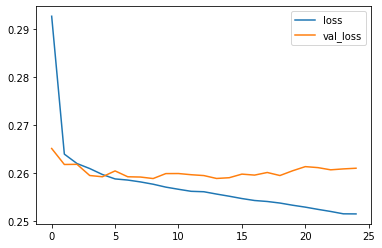

In [165]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [166]:
predictions = model.predict_classes(X_test)

In [167]:
from sklearn.metrics import classification_report, confusion_matrix

In [168]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.47      0.62     25480
           1       0.89      0.99      0.93    104943

    accuracy                           0.89    130423
   macro avg       0.90      0.73      0.78    130423
weighted avg       0.89      0.89      0.87    130423



In [169]:
print(confusion_matrix(y_test, predictions))

[[ 12089  13391]
 [  1253 103690]]


> The recall for Fully Paid is almost perfect which could be sign of overfitting in the data let's see if find anything insight in load_repaid columns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


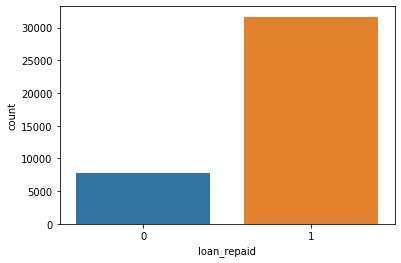

In [171]:
sb.countplot(sub_df['loan_repaid'])

> Target variable is skewed.

In [336]:
charged_off = df[df['loan_repaid']==0]
len(charged_off)

77523

In [337]:
fully_paid =  df[df['loan_repaid']==1]
len(fully_paid)

317696

In [427]:
from random import randint
fully_paid = fully_paid.sample(int(len(charged_off)+ len(charged_off)*0.10))

In [428]:
balanced_df = pd.concat([fully_paid, charged_off])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


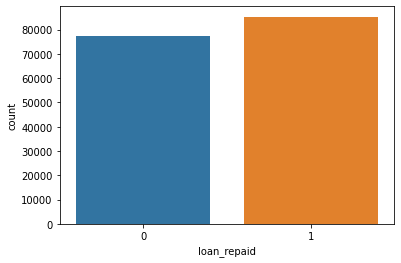

In [429]:
sb.countplot(balanced_df['loan_repaid'])

In [430]:
X_train, X_test, y_train, y_test = prepare_data(balanced_df)

In [431]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
#model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
#model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
#model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [432]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=20,
          batch_size=256,
          validation_data=(X_test, y_test)
          )

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

427/427 [==============================] - 2s 4ms/step - loss: 143.8183 - val_loss: 42.3144
Epoch 2/20
427/427 [==============================] - 1s 3ms/step - loss: 41.1306 - val_loss: 27.9392
Epoch 3/20
427/427 [==============================] - 1s 3ms/step - loss: 35.9372 - val_loss: 43.4857
Epoch 4/20
427/427 [==============================] - 1s 3ms/step - loss: 29.7637 - val_loss: 10.8501
Epoch 5/20
427/427 [==============================] - 1s 3ms/step - loss: 23.6960 - val_loss: 29.88

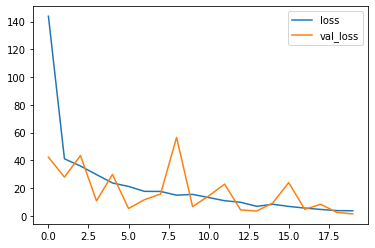

In [433]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [438]:
predictions = model.predict_classes(X_test)

In [439]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.90      0.71     25607
           1       0.83      0.44      0.57     28117

    accuracy                           0.66     53724
   macro avg       0.71      0.67      0.64     53724
weighted avg       0.71      0.66      0.64     53724



In [440]:
print(confusion_matrix(y_test, predictions))

[[22989  2618]
 [15763 12354]]


We'll be focusing on precision of fully paid.

---